# A stroke prediction

In [2]:
import pandas as pd
import seaborn as sb
dat = pd.read_csv("healthcare-dataset-stroke-data.csv")
dat.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data wrangling


In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


<AxesSubplot:>

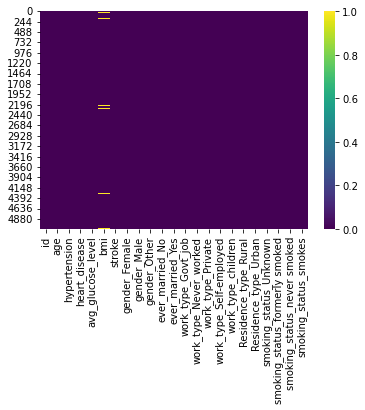

In [4]:
new_dat = pd.get_dummies(dat, columns = ["gender","ever_married","work_type","Residence_type","smoking_status"])
new_dat["age"] = new_dat["age"].astype("category")
new_dat.dtypes
new_dat.isnull().sum()
sb.heatmap(new_dat.isnull(), cmap = "viridis")

In [5]:
import numpy as np
new_dat["bmi"].fillna(np.mean(new_dat['bmi']), inplace =True)
new_dat.isnull().sum()

id                                0
age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
gender_Other                      0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [6]:
new_dat.drop(["id"], axis = 1, inplace = True)
new_dat.dtypes

age                               category
hypertension                         int64
heart_disease                        int64
avg_glucose_level                  float64
bmi                                float64
stroke                               int64
gender_Female                        uint8
gender_Male                          uint8
gender_Other                         uint8
ever_married_No                      uint8
ever_married_Yes                     uint8
work_type_Govt_job                   uint8
work_type_Never_worked               uint8
work_type_Private                    uint8
work_type_Self-employed              uint8
work_type_children                   uint8
Residence_type_Rural                 uint8
Residence_type_Urban                 uint8
smoking_status_Unknown               uint8
smoking_status_formerly smoked       uint8
smoking_status_never smoked          uint8
smoking_status_smokes                uint8
dtype: object

# Exploratory data analysis

In [7]:
#to show the relationship of those that have stroke
dat["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot:xlabel='age', ylabel='stroke'>

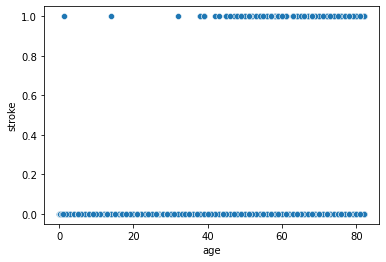

In [8]:
sb.scatterplot(x = "age",y = "stroke", data = new_dat)

<AxesSubplot:xlabel='stroke', ylabel='count'>

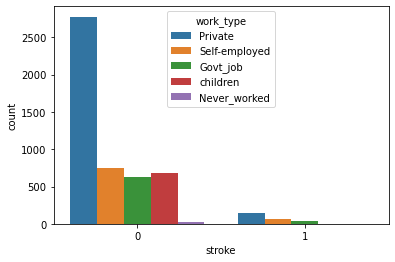

In [9]:
sb.countplot(data = dat, x = "stroke", hue ="work_type")

<AxesSubplot:xlabel='stroke', ylabel='count'>

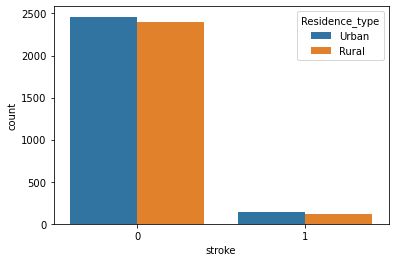

In [10]:
sb.countplot(data = dat, x = "stroke", hue ="Residence_type")

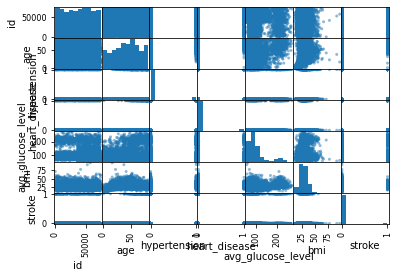

In [11]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
scatter_matrix(dat)
plt.show()

# Modelling process

In [12]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [13]:
y = new_dat["stroke"]
x = new_dat.drop(["stroke"], axis =1)
x.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [14]:
ss = StandardScaler()
x[["age","avg_glucose_level","bmi"]] = ss.fit_transform(x[["age","avg_glucose_level","bmi"]])

<AxesSubplot:>

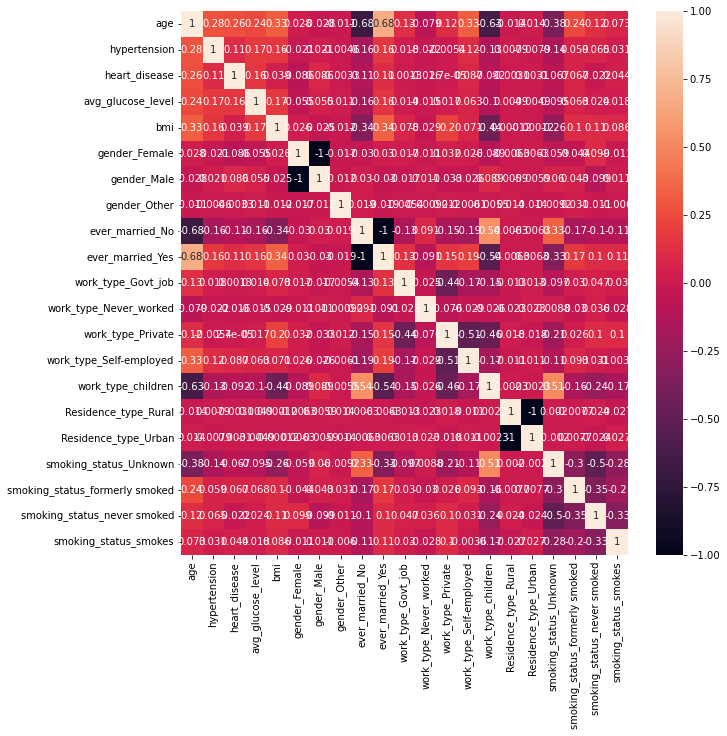

In [15]:
axes, fig = plt.subplots(1, figsize = (10,10))
sb.heatmap(x.corr(), annot = True)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
lr =  LogisticRegression()
RFC = RandomForestClassifier()
dtc = DecisionTreeClassifier()
file = [("LogisticRegression", lr),("RandomForestClassifier", RFC),("DecisionTreeClassifier", dtc)]

In [17]:
accuracies = []
names = []
for name, model in file:
    accuracy = cross_val_score(model, x, y, cv = 10).mean()
    accuracies.append(accuracy)
    names.append(name)
for i in range(len(names)):
    print("{}:{:.2f}".format(names[i],accuracies[i]*100))

LogisticRegression:95.13
RandomForestClassifier:94.97
DecisionTreeClassifier:90.96
